In [ ]:
"""With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form"""

"""
Algorithm:

Perceptron Class:
Initialization:
Step 1: Initialize a Perceptron object with optional parameters: learning_rate and epochs.
Step 2: Set the learning rate and number of epochs.
Training Method:

Step 1: Initialize weights as an array of zeros with the length of input features plus one (for the bias).
Step 2: Iterate over the range of epochs:
    Step 2.1: Iterate over each training sample xi and its corresponding target label target.
        Step 2.1.1: Calculate the update value using the formula: update = learning_rate * (target - predict(xi)).
        Step 2.1.2: Update the weights using the formula: self.weights[1:] += update * xi and self.weights[0] += update.

Prediction Method:
Step 1: Calculate the dot product of the input features X and the weights excluding the bias, then add the bias weight.
Step 2: Use np.where to return 1 if the summation is greater than or equal to 0, otherwise return 0.

Generate Data:
Step 1: Seed the random number generator.
Step 2: Define the number of samples per class.
Step 3: Generate random samples for each class using normal distribution with specified mean and standard deviation.
Step 4: Concatenate the data points and create labels.

Create and Train Perceptron:
Step 1: Create an instance of the Perceptron class with specified parameters.
Step 2: Train the perceptron on the generated data using the train method.

Plot Data and Decision Boundary:
Step 1: Create a scatter plot of the data points for each class.
Step 2: Calculate the decision boundary using the perceptron's weights.
Step 3: Plot the decision boundary on the same plot.
Step 4: Add title, labels, legend, and grid to the plot.
Step 5: Display the plot.
"""

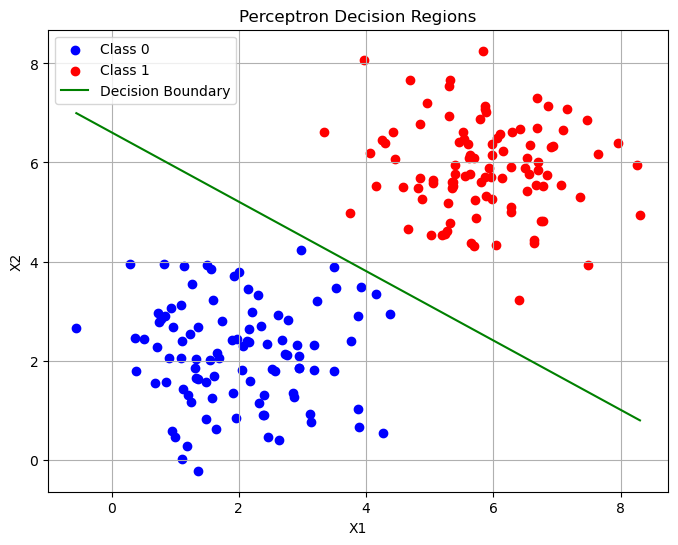

In [2]:
import numpy as np
import matplotlib.pyplot as plt
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
    def train(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
    def predict(self, X):
        summation = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.where(summation >= 0, 1, 0)
# Generate random data points for two classes
np.random.seed(0)
num_samples = 100
class_0 = np.random.normal(loc=[2, 2], scale=[1, 1], size=(num_samples, 2))
class_1 = np.random.normal(loc=[6, 6], scale=[1, 1], size=(num_samples, 2))
# Concatenate the data points and create labels
X = np.vstack([class_0, class_1])
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])
# Create and train the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=1000)
perceptron.train(X, y)
# Plot the data points for each class
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')
# Plot the decision boundary
w0, w1, w2 = perceptron.weights
slope = -w1 / w2
intercept = -w0 / w2
x_boundary = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_boundary = slope * x_boundary + intercept
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')
plt.title('Perceptron Decision Regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()